**Project-Customer Churn Analysis**


**This Project lays down emphasis on keeping the existing customers it has been studied and proven that keeping and cross selling the products to existing customers is much beneficial for the companies**

**We will be providing deep insights of this data set**

In [75]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [47]:
df = pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Observations**

**We are going to drop customerID as this is a seprate ID given to every customer and logically it is not helpful in any kind of retaining of customers**

**We have 18 categorical features for which need need to analyse their Data types and 3 continuous features,Data type to be checked for these as well**

**Our Target is categorical and this task is Classification**

**We will be checking unique values for this data set their are chances they might have blank spaces or any illogical values**

**Since Dataset is large we may find count of Duplicates and Null values**

**Lets begin the task**

In [27]:
#Checking Data type of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**No null values has been observed we will be cross checking the same but we can see Senior citizen is holding integer datatype which has to be object**


In [48]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)


**Checking the changes**

In [34]:
df['SeniorCitizen'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: SeniorCitizen
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


**Dropping the customerID column it is of no use**

In [49]:
df.drop(columns=['customerID'],inplace=True)

**Recheck**

In [36]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


**Checking Null values**

In [37]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**No null values in our Dataset,Lets check for Duplicates**

In [38]:
df.duplicated().sum()

22

**Their are 22 duplicate values present in our dataset**

In [50]:
print(f"Rows and Columns before dropping duplicates: ", df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df.shape)


Rows and Columns before dropping duplicates:  (7043, 20)
Rows and Columns after dropping duplicates:  (7021, 20)


In [40]:
print("Percentage loss after dropping Duplicate values",22/7043*100)

Percentage loss after dropping Duplicate values 0.3123668891097544


**Miniscule Data Loss**

**Lets seprate Integer/Float and Object Data type columns**

In [51]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)

Object Data Type Columns are:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [52]:
numeric_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numeric_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", numeric_datatype)


Number Data Type Columns are:
 ['tenure', 'MonthlyCharges']


**We have noticed that Total Charges column has not been included in Numeric Data type where we are trying to convert the same in float but it is showing errors their might be possibility their are blank spaces in same**

**Lets check**

In [46]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)


gender
Male      3541
Female    3480
Name: gender, dtype: int64
SeniorCitizen
0    5880
1    1141
Name: SeniorCitizen, dtype: int64
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64
TechSupport
No                     

**we are Replacing the spaces and values**

**Class Imbalance has been observed in Target Variable**

In [53]:
df['TotalCharges'] = df['TotalCharges'].replace(' ' , '0.0')
df['TotalCharges'].value_counts()


0.0       11
19.75      9
20.2       8
19.9       7
19.65      7
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [54]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [55]:
numeric_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numeric_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", numeric_datatype)


Number Data Type Columns are:
 ['tenure', 'MonthlyCharges', 'TotalCharges']


**We have succesfully replaced the values**

**we are satisfied to proceed**

In [51]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7021,2,Male,3541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7021.0,2.0,0.0,5880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,7021,2,No,3619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7021,2,No,4911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7021.0,NaN,NaN,NaN,32.469449,24.534965,0.0,9.0,29.0,55.0,72.0
PhoneService,7021,2,Yes,6339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7021,3,No,3368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7021,3,Fiber optic,3090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7021,3,No,3490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7021,3,No,3080,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Since their are more categorical features overall description will be visualized**

**For continuous features we can observe Outliers and Skewness**

# Visualization

Count of values in column 
 Male      3541
Female    3480
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

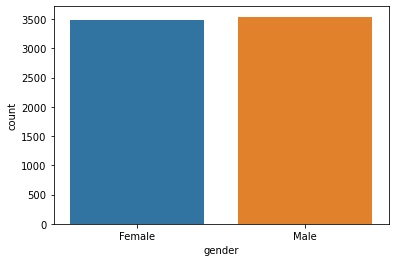

In [62]:
print('Count of values in column','\n',df['gender'].value_counts())
sns.countplot(x='gender',data=df)

                              **Observations**
                              
**Almost equal count of Males and Females are present in this column which will be useful for providing a balanced insights of both Gender**

**Out of total number of Customers 50.43% are Males and 49.56% are Females**

Count of values in column 
 0    5880
1    1141
Name: SeniorCitizen, dtype: int64


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

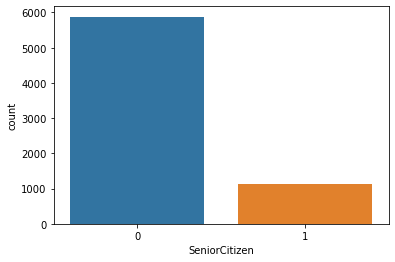

In [61]:
print('Count of values in column','\n',df['SeniorCitizen'].value_counts())
sns.countplot(x='SeniorCitizen',data=df)

                                       **Observations**

**Here 0 defines customer is not a Senior citizen where 1 defines customer is a senior citize,we can visualize a very less count of Senior citizens present in our Dataset**

**Out of total customers we have 16.25% of Senior citizens**

Count of values in column 
 No     3619
Yes    3402
Name: Partner, dtype: int64


<AxesSubplot:xlabel='Partner', ylabel='count'>

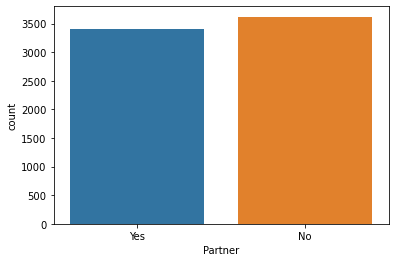

In [59]:
print('Count of values in column','\n',df['Partner'].value_counts())
sns.countplot(x='Partner',data=df)

**Customer without Partners are having a slighter edge as compared to customer with Partners**

**Customers without partners are 51.54%**

**Customers with partners are 48.45%**

Count of values in column 
 No     4911
Yes    2110
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

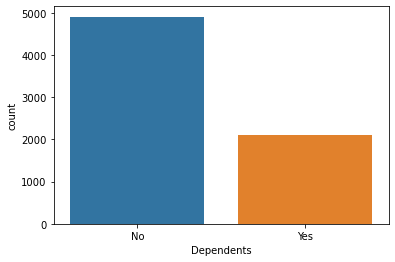

In [63]:
print('Count of values in column','\n',df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df)

**Customers with dependents are even less than half of the customers who are not having dependents**

**69.94% of customers are not having any dependent**

**31.47% of customers are having dependents**

Count of values in column 
 Yes    6339
No      682
Name: PhoneService, dtype: int64


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

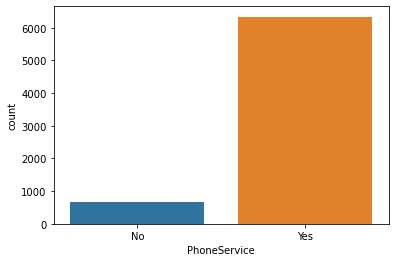

In [64]:
print('Count of values in column','\n',df['PhoneService'].value_counts())
sns.countplot(x='PhoneService',data=df)

**Most of the customers are availing Phone service facility which has been visualized on the higher side,we have miniscule count of customers who are not using the Phone service**

**Perecentage of customers not using PhoneService------ 9.71%**

**Perecentage of customers using PhoneService-----------90.28%**

Count of values in column 
 No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

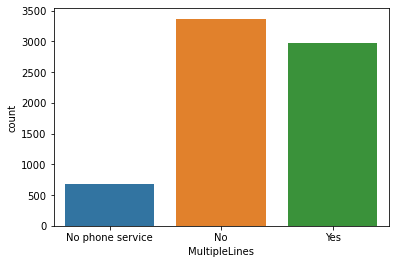

In [65]:
print('Count of values in column','\n',df['MultipleLines'].value_counts())
sns.countplot(x='MultipleLines',data=df)

**In above figure we have visualized a very less count of customers who are not using Phone service here in this figure we can visualize the same and we can also visual that customers without Multiple lines are 13.36% approx higher as compared to customers with Multiple lines**

**Percentage of customer without multiple lines --- 47.97%**

**Percentage of customer with multiple lines --- 42.31%**

**Percentage of customers without phone Service---- 9.71%**

Count of values in column 
 Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


<AxesSubplot:xlabel='InternetService', ylabel='count'>

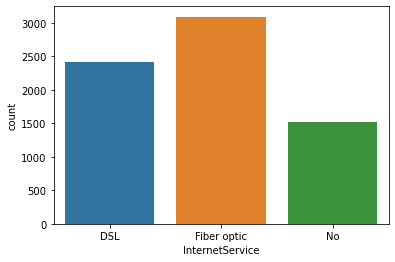

In [67]:
print('Count of values in column','\n',df['InternetService'].value_counts())
sns.countplot(x='InternetService',data=df)

**Fibre optic is 27.71% higher than DSL and 104.06% higher than customers who are not using Internet Services,where DSL Service has also been opted by customers which is 21.71% lower than the Fibre optic**

**Fibre optic is more usable internet service**

Count of values in column 
 No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

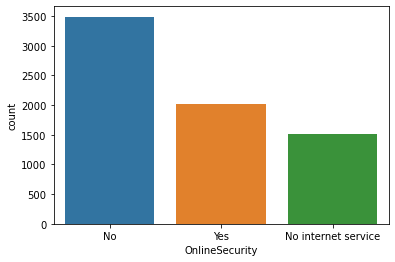

In [72]:
print('Count of values in column','\n',df['OnlineSecurity'].value_counts())
sns.countplot(x='OnlineSecurity',data=df)

**Count of customer availing this add on services are 42.14% lower than the customers who are not availing this add on facility**

**we have observed a huge gap on this add on services,we can push  to reduce the margin**

Count of values in column 
 No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

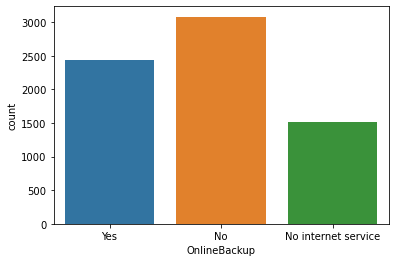

In [73]:
print('Count of values in column','\n',df['OnlineBackup'].value_counts())
sns.countplot(x='OnlineBackup',data=df)

**Count of No in online Backup are 26.80% higher as compared with count of yes**

**We can get the customer aware about the Online backup facility where giving a facility to customer can decrease the churn of customers**

Count of values in column 
 No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

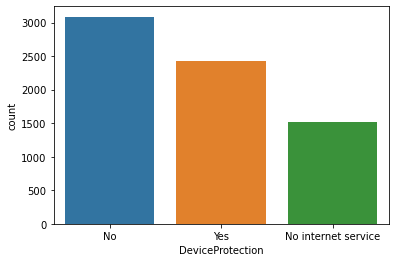

In [74]:
print('Count of values in column','\n',df['DeviceProtection'].value_counts())
sns.countplot(x='DeviceProtection',data=df)

**Count of No in Device Protection is 27.45% higher than Yes**

**These services are add on and can be helpful in many ways,we have focus and reduce the margins whch will provide us a direct benefit in service and Churn controll**

Count of values in column 
 No                     3465
Yes                    2044
No internet service    1512
Name: TechSupport, dtype: int64


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

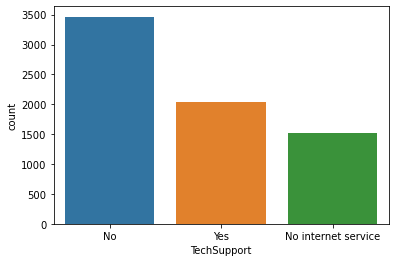

In [75]:
print('Count of values in column','\n',df['TechSupport'].value_counts())
sns.countplot(x='TechSupport',data=df)

**Count of No is 69.52% higher than count of Yes in Technical support, where in this contemprory era this part plays a important role**

**We can also notice that many people do not have Internet service where Internet is playinh a good role in transforming lifes,these people can be re-pitched for availing the services**

Count of values in column 
 No                     2802
Yes                    2707
No internet service    1512
Name: StreamingTV, dtype: int64


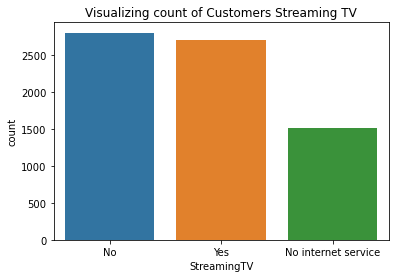

Count of values in column 
 No                     2777
Yes                    2732
No internet service    1512
Name: StreamingMovies, dtype: int64


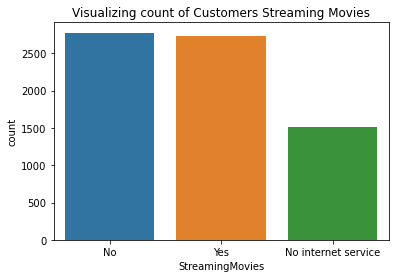

In [78]:
print('Count of values in column','\n',df['StreamingTV'].value_counts())
sns.countplot(x='StreamingTV',data=df)
plt.title("Visualizing count of Customers Streaming TV")
plt.show()

print('Count of values in column','\n',df['StreamingMovies'].value_counts())
sns.countplot(x='StreamingMovies',data=df)
plt.title("Visualizing count of Customers Streaming Movies")

plt.show()

**Observations**

**Count of No is higher by 3.50% percent in Customers streaming TV we can see a excellent growth in this segment**

**Count of No is higher on a very minimum scale of 1.64% ,we can see these two segments are well connected where TV and movies on TV are showing a connection**

Count of values in column 
 Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64


<AxesSubplot:xlabel='Contract', ylabel='count'>

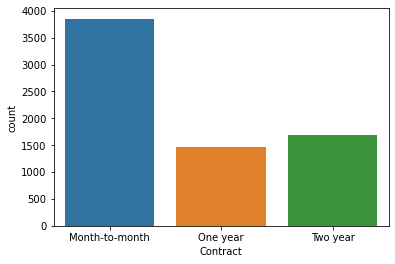

In [79]:
print('Count of values in column','\n',df['Contract'].value_counts())
sns.countplot(x='Contract',data=df)

**Out of all the customers in Dataset the percentage of customers availing the different contracts are------**

**20.97% customers are availing One year contract**

**24.14% customers are availing Two year contract**

**54.87% customers are availing Month-to-Month contract**

**We can push to increase the count of customers for long-run contracts as these provides a better chance of cross sell and providing add-ons**

Count of values in column 
 Yes    4161
No     2860
Name: PaperlessBilling, dtype: int64


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

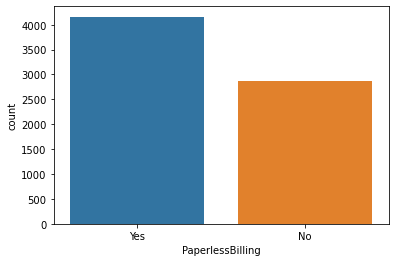

In [80]:
print('Count of values in column','\n',df['PaperlessBilling'].value_counts())
sns.countplot(x='PaperlessBilling',data=df)

**We can visualize that customers who are availing PaperlessBillings are 45.48% higher than the customers who have not opted for this facility**

**This facility is directly associated with the cost parameter and must be pitched to every customer to achieve around 90%**

Count of values in column 
 Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


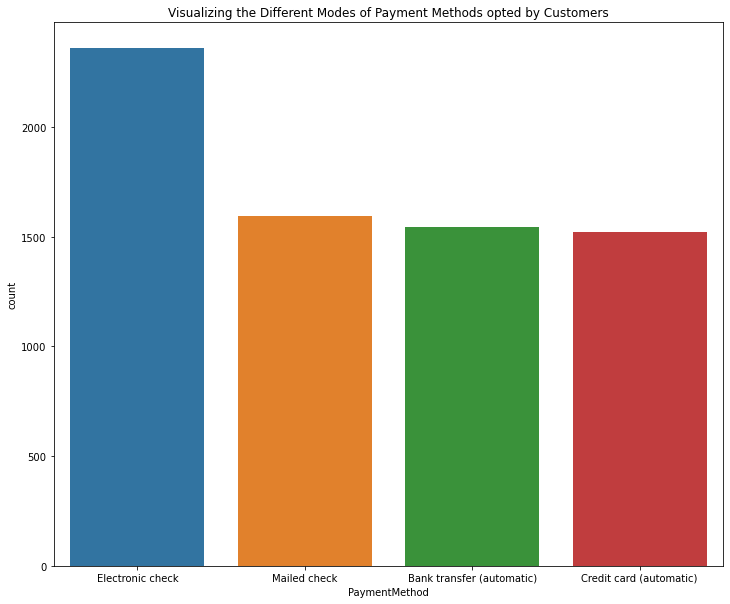

In [84]:
plt.figure(figsize=(12,10))
print('Count of values in column','\n',df['PaymentMethod'].value_counts())
sns.countplot(x='PaymentMethod',data=df)
plt.title("Visualizing the Different Modes of Payment Methods opted by Customers")
plt.show()

**Out of all availaible Payment modes customers preferences are-**

**Electronic Check- 33.59%**

**Mailed check- 22.71%**

**Bank transfer(automatic)- 21.99%**

**Credit Card(automatic)- 21.67%**

**We can also visualize the same that count of Electronic cheque has been visualized as the most usable where all other methods stands almost equal in percentage**

Count of values in column 
 No     5164
Yes    1857
Name: Churn, dtype: int64


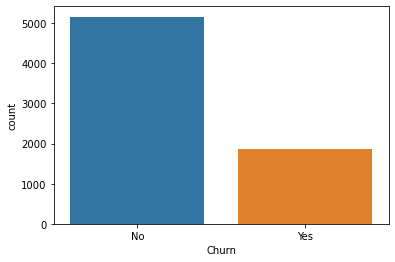

In [86]:
print('Count of values in column','\n',df['Churn'].value_counts())
sns.countplot(x='Churn',data=df)

plt.show()

**The percentage of customers who has not churned are on the higher side i.e. 73.55%, where 26.44% has churned which is also a higher side and logically we have to minimise the gap of customers who are opting for a churn**


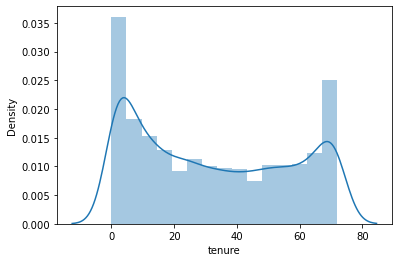

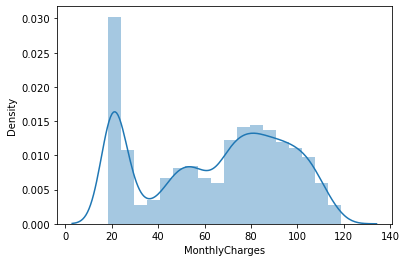

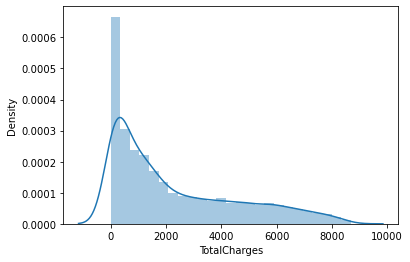

In [93]:
#Distribution for Continuous columns

sns.distplot(df['tenure'])
plt.show()

sns.distplot(df['MonthlyCharges'])
plt.show()

sns.distplot(df['TotalCharges'])
plt.show()


**During Data description we have observed that their is Skewness present  and also the presence of Outliers in our continuous columns**

**we have visualized the Data and same has been found present,we will correct the same in Data cleaning**

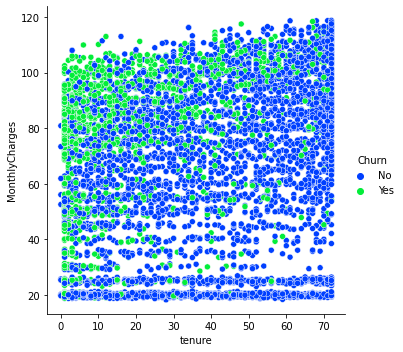

In [63]:
plt.style.use('seaborn-bright')

sns.relplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')

                 **Observations**
                 
**In range of tenure 0-18 maximum churns has been visualized,their maybe a common problem exist which has to be addressed for stopping churn**

**As when Tenure and Monthly charges increases we can visualize very less churns**


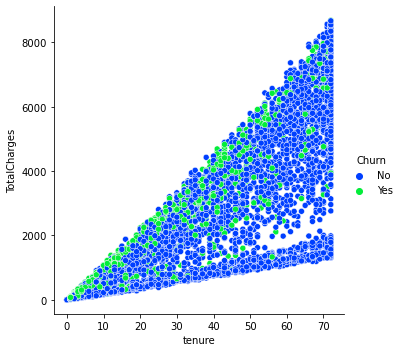

In [64]:
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='Churn')

                                  **Observations**
                                  
**Maximum count of churns has been observed in the begining ,post tenure of 50 and charges of 4300 we can see a downfall in number of churns**

**Long term tenure has been visualized as preferable for customers**

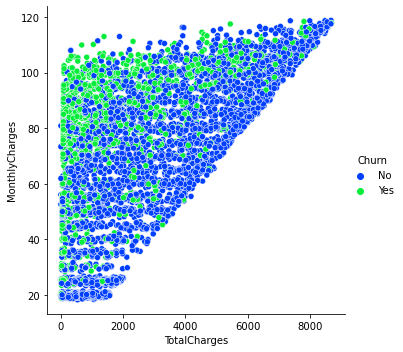

In [65]:
sns.relplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')

                                 **Observations**

**Maximum churns has been observed in range of 1800 for TotalCharges for Monthly charges it is around 100**


                                 

<Figure size 1080x1008 with 0 Axes>

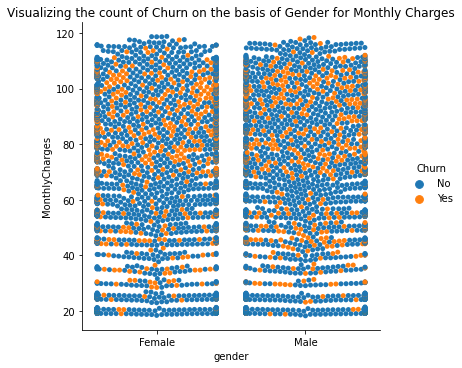

In [41]:
plt.figure(figsize=(15,14))
sns.catplot(x='gender',y='MonthlyCharges',hue='Churn',kind='swarm',data=df)
plt.title("Visualizing the count of Churn on the basis of Gender for Monthly Charges")
plt.show()


                       **Observations**
                       
**Gender wise both males and females are showing the same trend,with increase in Monthly Charges we are able to visualize that almost in all the charges range their are equal churns present**

**In Charges range of around 70 has been visualized as the a very churn of Males as compared to Females**

<Figure size 1584x1440 with 0 Axes>

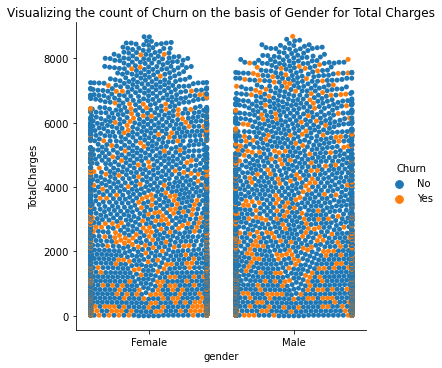

In [42]:
plt.figure(figsize=(22,20))
sns.catplot(x='gender',y='TotalCharges',hue='Churn',kind='swarm',data=df)
plt.title("Visualizing the count of Churn on the basis of Gender for Total Charges")
plt.show()

                                **Observations**
                                
**Males are more in count for Churn as compared to Females**

**Increase in TotalCharges gives a direct higher increase to Churn of Males as compared with Females**

**Females are showing churns in the begining where after that we can notice a less amount of churn of Females as compared to Males**

<Figure size 1440x1296 with 0 Axes>

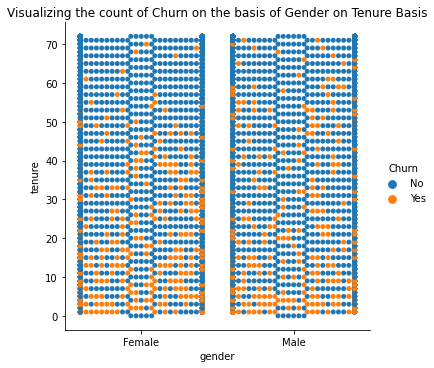

In [44]:
plt.figure(figsize=(20,18))
sns.catplot(x='gender',y='tenure',hue='Churn',kind='swarm',data=df)
plt.title("Visualizing the count of Churn on the basis of Gender on Tenure Basis")
plt.show()

**From visualization we are utter sure that count of Males are showing more Attritions as compared with count of females**

**Their maybe a specific or genealized way to find and resolve the issues of Males to stop them from churns**

**Females are prefering tenure above 60 months as we can observe a very miniscule churns**

# Visualizing Churns

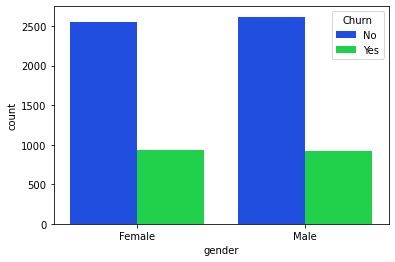

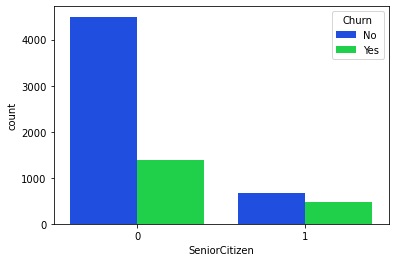

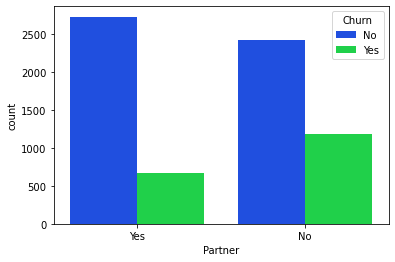

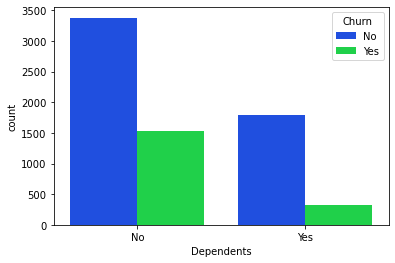

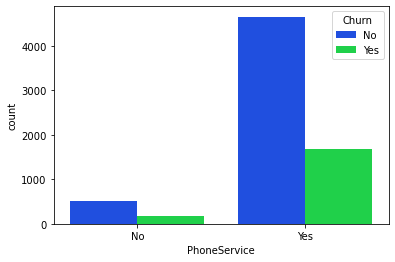

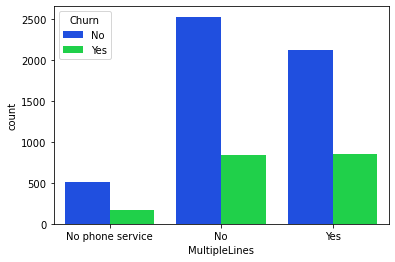

In [68]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.show()
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.show()
sns.countplot(x='Partner', hue='Churn', data=df)
plt.show()
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.show()
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.show()
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.show()

                                       **Observations**
                                       
Basis of Gender

**Males and Females has been visualized as almost same in count of Churns and even when their are no Churns**

Basis of SeniorCitizen

**Senior citizen are less in count but out all of them we can see a very higher count of Senior citizens are adopting Churns,we need to focus on this segment**

Basis of Partner

**Customers having partners are prefering to stay and customers who do not have partners are more in count of churns as compared to customers having partners**


Basis of Dependents

**Customers who do not have any dependents are prefering more churns as compared with customers who are having dependents**
**we can also visualize tat same segment are showing a vice-versa churns wise but still count is higher as mentioned above**

Basis of Phone service

**We are considering the customers having Phone service where count of NO is approx 55% above the count of yes,but still it is no a satisfactory condition,this area has to be targeted to avoid churns**

Basis of Multiple Lines

**Customers who are having multiple lines and customers who are not having multiple lines are showing the same count for churns,ideally their must be a difference in both,this segment needs to be checke and focus is required on same**





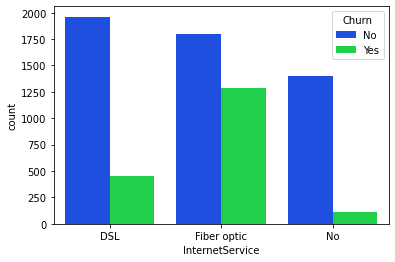

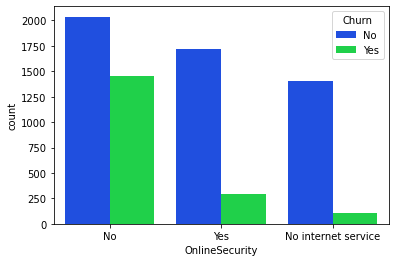

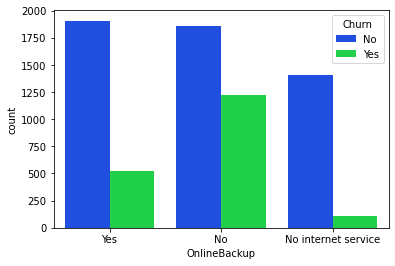

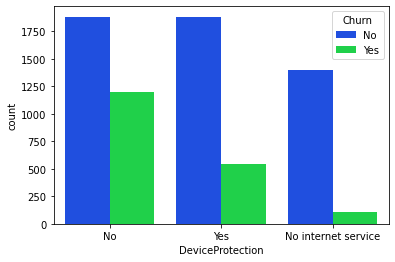

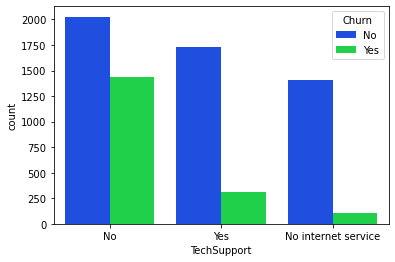

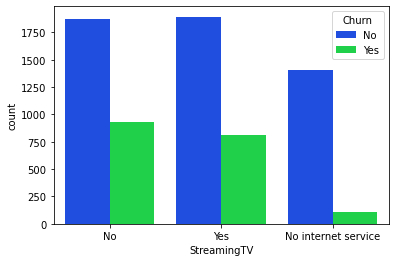

In [69]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.show()
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.show()
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.show()
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.show()
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.show()
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.show()

                             **Observations**
                             
Internet Service

**Fibre optic which has been considered as the most usable Internet service is inculcate with the maximum count of churns,we have to minimize this**

Online Security

**Customers who has not taken Online security are amingst the one who has shown maximum churns,we need to pitch this service to customers as we can visualize customers having this facility is showing very less churns**

Online Backup

**Customers without any Online backup are showing maximum count of churns this is also observed in Online security where customers without add on service are tend to show more churns**

Device Protection & Tech Support

**Customers without having this support and protection tends to show more churn ,we can be sure as of now these packages and add-on services are very important for retention of Customers**

Streaming TV

**Almost equal count of trend has been observed for the customers Streaming TV,with the count of yes their are comparatibly less churns**


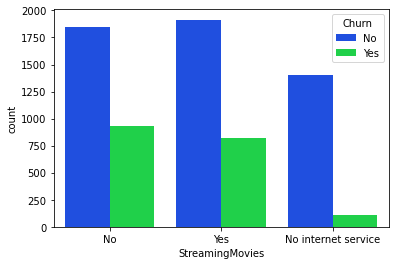

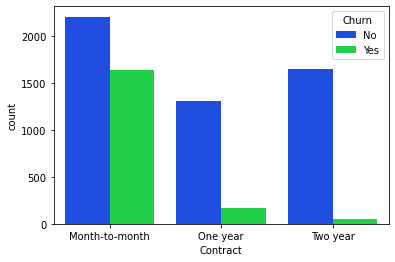

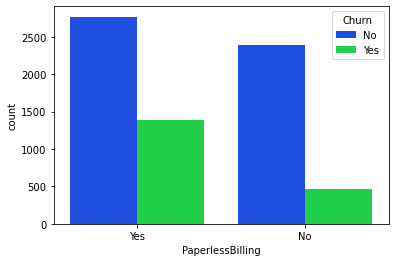

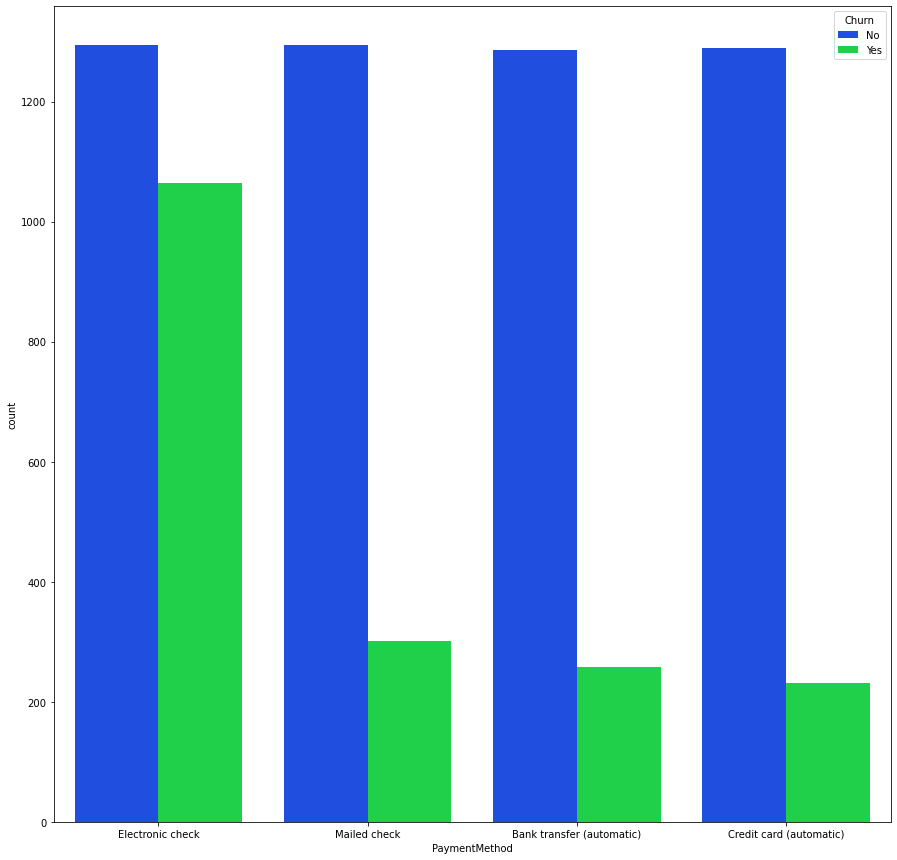

In [71]:
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.show()
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.show()
plt.figure(figsize=(15,15))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.show()


                                      **Observations**

Streaming Movies

**Almost equal count of trend has been observed for the customers StreamingMovies,with the count of yes their are comparatibly less churns as compared to count of NO**

Contract

**Customers having long contracts tends to show less churns where customer having Month contracts are showing a very huge amount of churns,this segment has to be targeted and convert Month contracts for longer contracts as soon as possible**

Paperless Billing

**Customers who has opted for this facility are showing more churns as compared to customers who has not opted for this facility**

Payment Method

**Customers who has opted for Electronic check has shown the maximum count of churns as compared to every other category in Payment Method,least churns has been noticed with the customers who has opted for Credit cards as Payment Method**

# Checking the distribtion of Data for columns

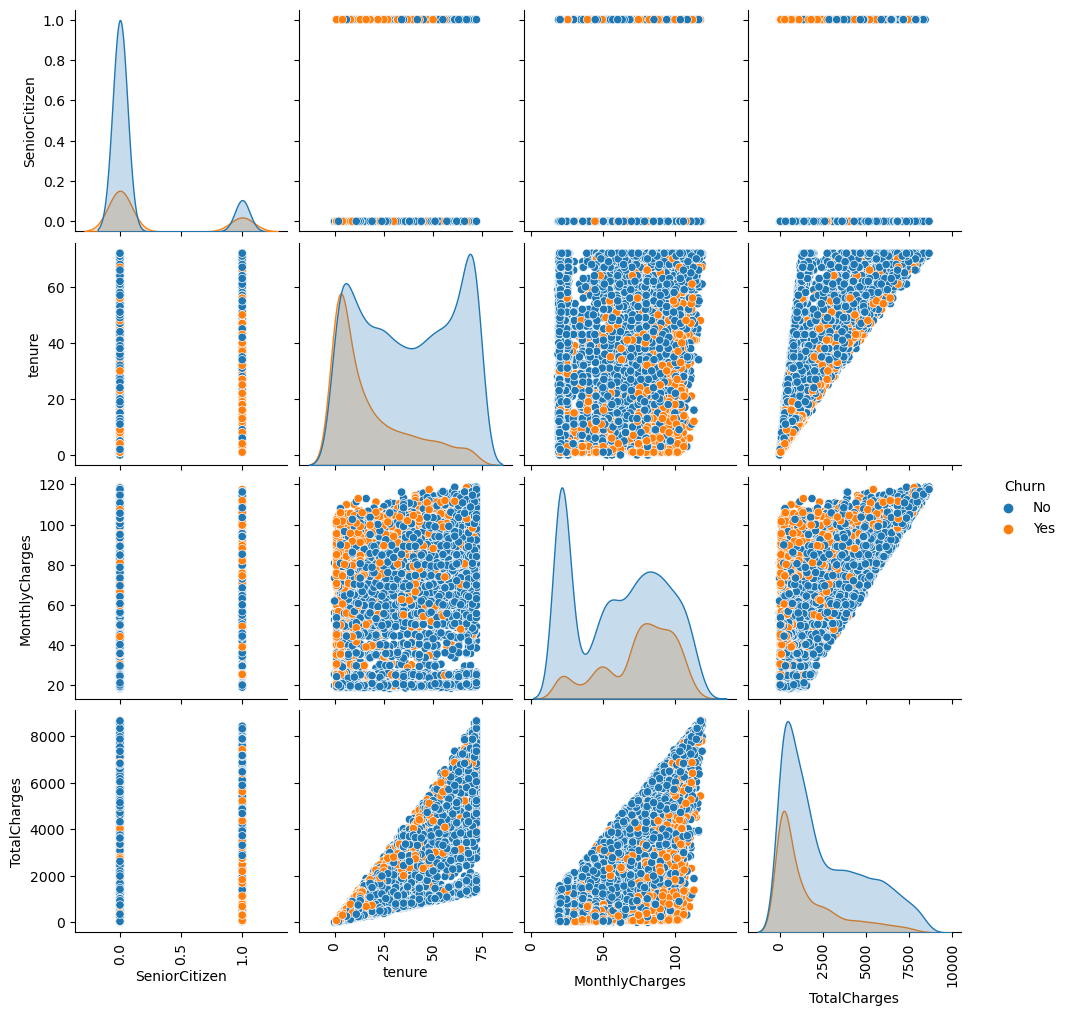

In [73]:
plt.style.use('default')
g = sns.pairplot(df, hue='Churn', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

**Data distribution has been Visualized**

**Encoding**

In [76]:


oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(df, ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'SeniorCitizen',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,No
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,No


In [77]:
#Encoding of target variable
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1


**Encoding part is Completed**

**OUTLIERS**

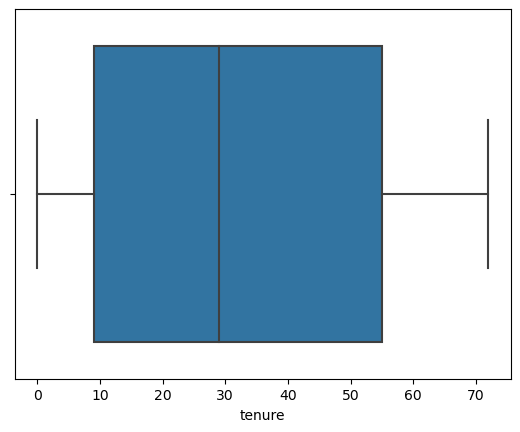

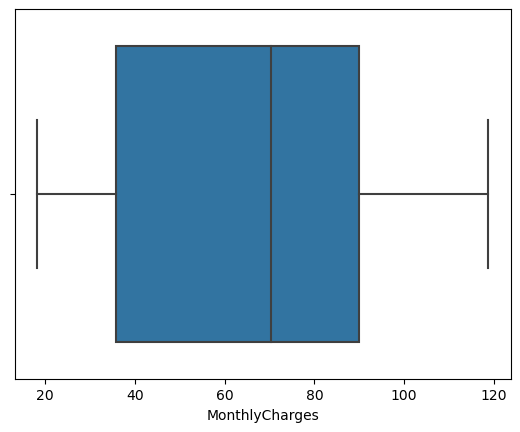

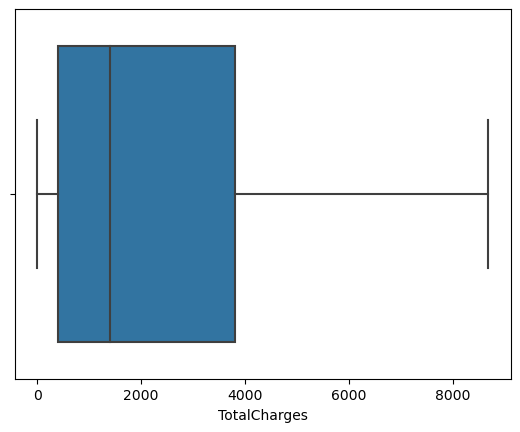

In [85]:
sns.boxplot(df['tenure'])
plt.show()

sns.boxplot(df['MonthlyCharges'])
plt.show()

sns.boxplot(df['TotalCharges'])
plt.show()
    

**No Outliers has been visualized for continuous columns**

**Skewness Check**

In [86]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
PhoneService       -2.721300
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.959910
Churn               1.068139
dtype: float64

**Using Log Transform to fix skewness**

In [88]:
for i in numeric_datatype:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

**Visualizing of Data post Encoding**

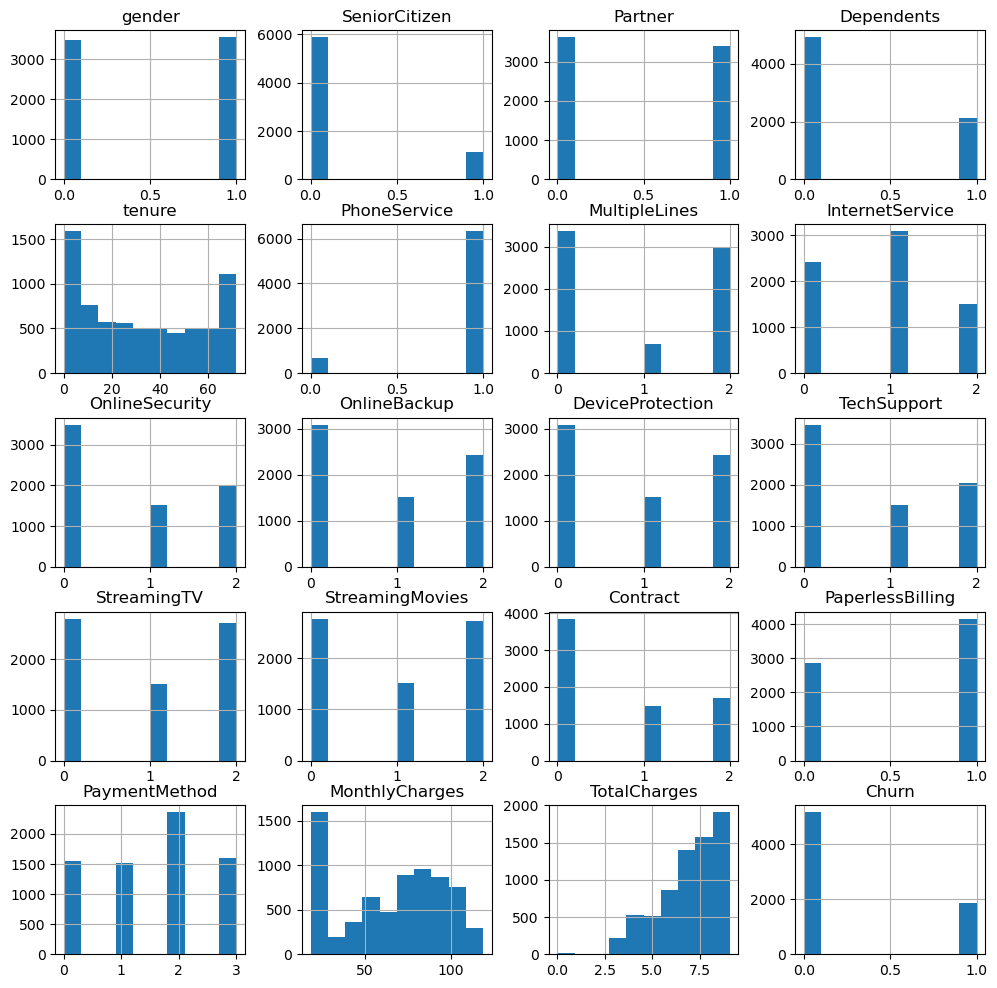

In [91]:
df.hist(figsize=(12,12))
plt.show()

**Data has been been visualized as Satisfactory**

In [92]:
x= df.drop(columns=['Churn'])
y = df['Churn']

**Multi-Collinearity check**

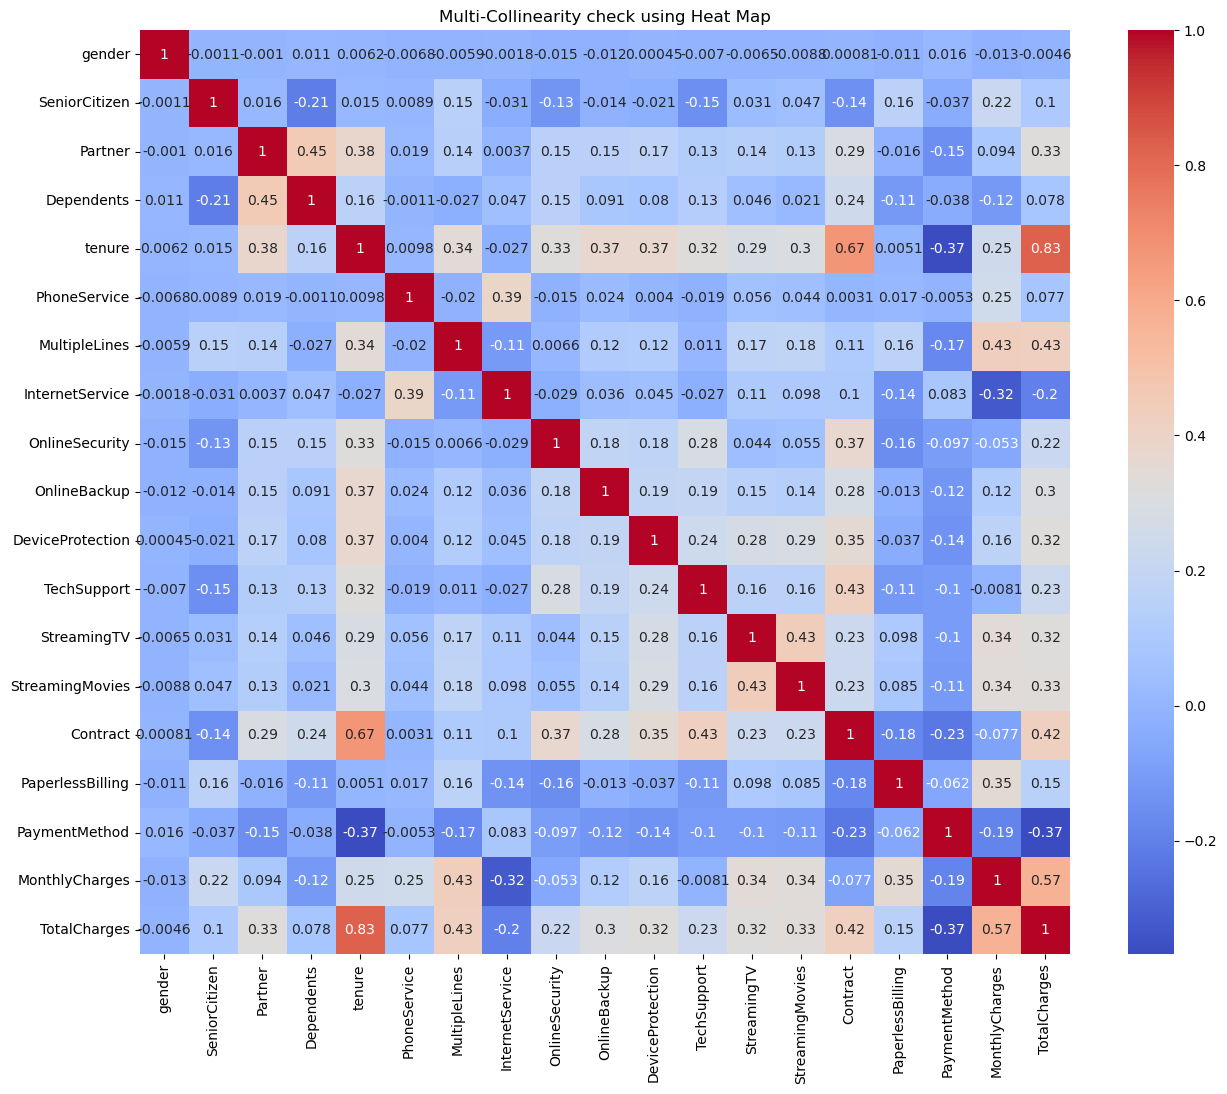

In [93]:
coreleation= x.corr()
plt.figure(figsize=(15,12))
plt.title("Multi-Collinearity check using Heat Map")
sns.heatmap(coreleation,cbar=True,annot=True,cmap= 'coolwarm')
plt.show()

**No sign of Multi-Collinearity has been Visualized ,no feature is crossing the bare minimum 85%**

**VIF**

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,gender,1.986036
1,SeniorCitizen,1.371001
2,Partner,2.828336
3,Dependents,1.973162
4,tenure,11.541592
5,PhoneService,15.968878
6,MultipleLines,2.764260
7,InternetService,4.305811
8,OnlineSecurity,2.285018
9,OnlineBackup,2.436675


**Correlation**

<AxesSubplot:>

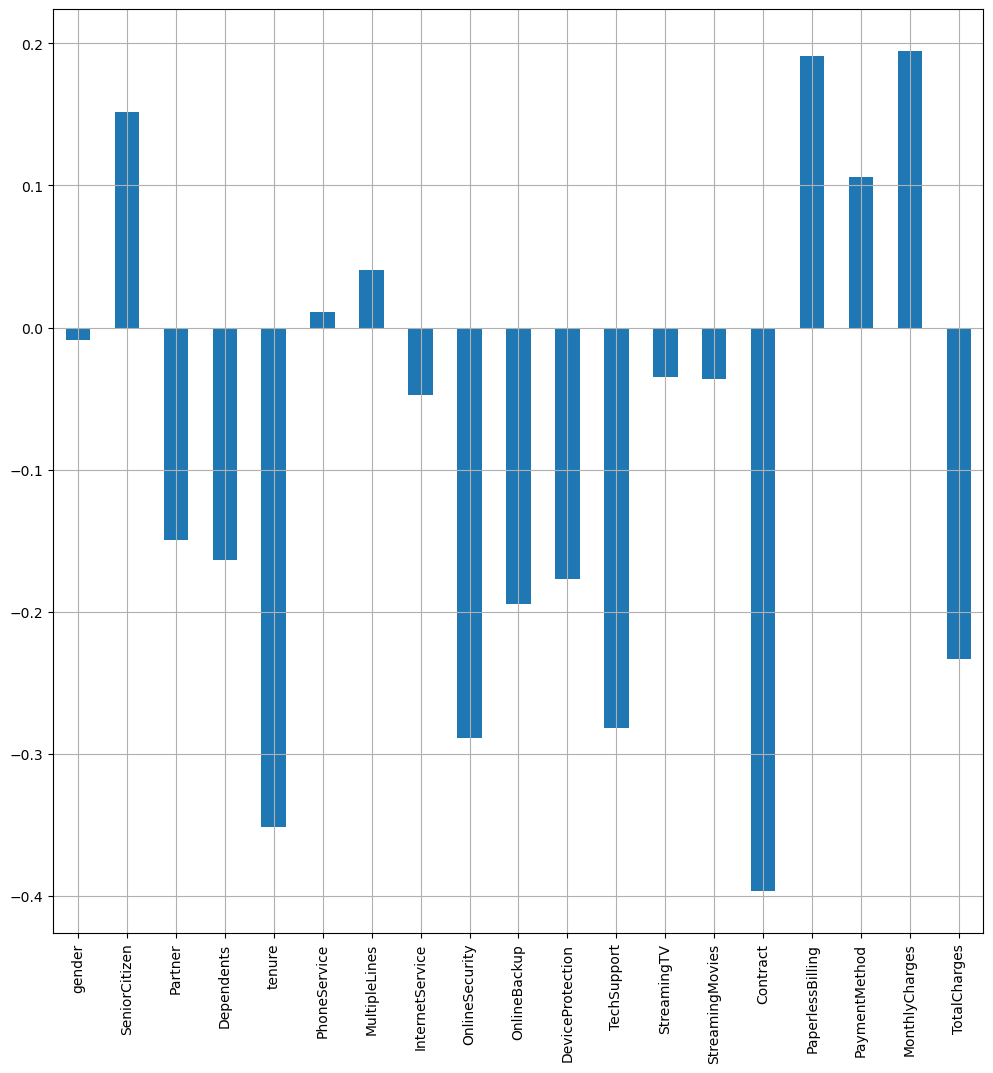

In [96]:
df.drop('Churn',axis=1).corrwith(df.Churn).plot(kind='bar',grid=True,figsize=(12,12))

**Monthly charges,Payment Method,Paperless Billing, Mulltiple lines and phone service are the only Positively correlated features**

**Apart from these all features are negatively correlated with target**

**Class Imbalance using SMOTE**

In [97]:
#Importing Library
from imblearn.over_sampling import SMOTE
over = SMOTE()
x, y = over.fit_resample(x, y)

y.value_counts()

0    5164
1    5164
Name: Churn, dtype: int64

**Data Scaling using Standard Scaler**

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
##Scaling data using Standard Scaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.053168,-0.518447,1.175672,-0.60023,-1.110103,-3.185323,0.027210,-1.277754,-0.779813,1.371158,-0.920841,-0.785544,-1.069113,-1.074289,-0.666579,0.758721,0.367836,-1.336905,-2.067179
1,1.039729,-0.518447,-0.917379,-0.60023,0.264904,0.317577,-1.039717,-1.277754,1.650245,-0.922353,1.367898,-0.785544,-1.069113,-1.074289,0.642376,-1.404864,1.389533,-0.391012,0.495794
2,1.039729,-0.518447,-0.917379,-0.60023,-1.068437,0.317577,-1.039717,-1.277754,1.650245,1.371158,-0.920841,-0.785544,-1.069113,-1.074289,-0.666579,0.758721,1.389533,-0.499214,-1.280259
3,1.039729,-0.518447,-0.917379,-0.60023,0.723240,-3.185323,0.027210,-1.277754,1.650245,-0.922353,1.367898,1.634810,-1.069113,-1.074289,0.642376,-1.404864,-1.675559,-0.902353,0.479524
4,-1.053168,-0.518447,-0.917379,-0.60023,-1.068437,0.317577,-1.039717,0.215891,-0.779813,-0.922353,-0.920841,-0.785544,-1.069113,-1.074289,-0.666579,0.758721,0.367836,0.088915,-1.071368


**Importing necessary Libraries for Model building**

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Finding maximum accuracy**

In [101]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 79.82184353214562 on Random State 592


**Train_Test_Split**

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=592)

**Defining a function to print Accuracy_score,CV_Score,printing Classification_report and finally the result by deducting Accuracy score from CV score to choose the least difference model**

In [103]:
# Classification Model Function

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=431)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

**Logistic Regression**

In [104]:
# Logistic Regression

model=LogisticRegression()
classify(model, x, y)

Accuracy Score: 77.84663051897753

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77      1311
           1       0.76      0.81      0.78      1271

    accuracy                           0.78      2582
   macro avg       0.78      0.78      0.78      2582
weighted avg       0.78      0.78      0.78      2582

Cross Validation Score: 77.74038333071591

Accuracy Score - Cross Validation Score is 0.10624718826161939


**Decision Tree Classifier**

In [105]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, x, y)

Accuracy Score: 80.40278853601859

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1311
           1       0.79      0.81      0.80      1271

    accuracy                           0.80      2582
   macro avg       0.80      0.80      0.80      2582
weighted avg       0.80      0.80      0.80      2582

Cross Validation Score: 80.63633742666345

Accuracy Score - Cross Validation Score is -0.23354889064485462


**Random Forest Classifier**

In [106]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, x, y)

Accuracy Score: 85.5151045701007

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1311
           1       0.86      0.85      0.85      1271

    accuracy                           0.86      2582
   macro avg       0.86      0.86      0.86      2582
weighted avg       0.86      0.86      0.86      2582

Cross Validation Score: 84.7418576796233

Accuracy Score - Cross Validation Score is 0.7732468904774095


**KNeighbours Classifier**

In [107]:
# KNeighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, x, y)

Accuracy Score: 77.84663051897753

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.66      0.75      1311
           1       0.72      0.90      0.80      1271

    accuracy                           0.78      2582
   macro avg       0.80      0.78      0.78      2582
weighted avg       0.80      0.78      0.78      2582

Cross Validation Score: 77.7694437087024

Accuracy Score - Cross Validation Score is 0.07718681027513696


**XGB Classifier**

In [108]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, x, y)

Accuracy Score: 85.36018590240124

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1311
           1       0.87      0.83      0.85      1271

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.85      2582
weighted avg       0.85      0.85      0.85      2582

Cross Validation Score: 83.93848988230992

Accuracy Score - Cross Validation Score is 1.4216960200913178


**Hyperparameter Tuning on Final Model Random Forest Classifier**

In [109]:
fmod_param = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2, 3, 4, 5],
              'min_samples_split':[3,5,7,9],
              'min_samples_leaf' : [2,3,4,5]}

In [110]:
GSCV = GridSearchCV(RandomForestClassifier(), fmod_param, cv=5)

In [111]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [3, 5, 7, 9]})

In [112]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 7}

In [113]:
Final_Model = RandomForestClassifier(criterion="gini", max_depth=5, min_samples_leaf=2,min_samples_split=7)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 82.571649883811


**ROC Curve**

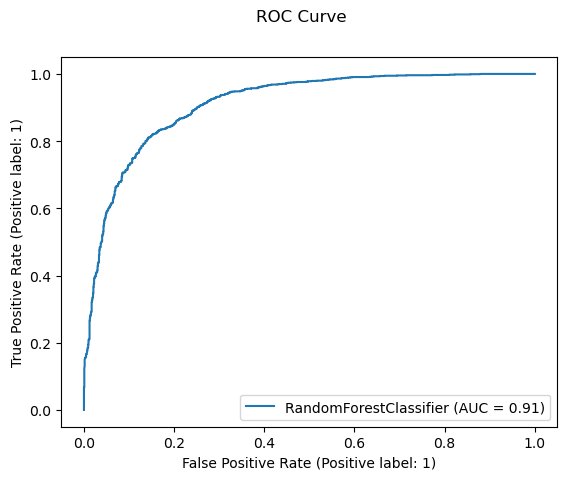

In [115]:
auc = metrics.plot_roc_curve(Final_Model, x_test, y_test)
auc.figure_.suptitle("ROC Curve")
plt.show()

**Confusion Matrix**

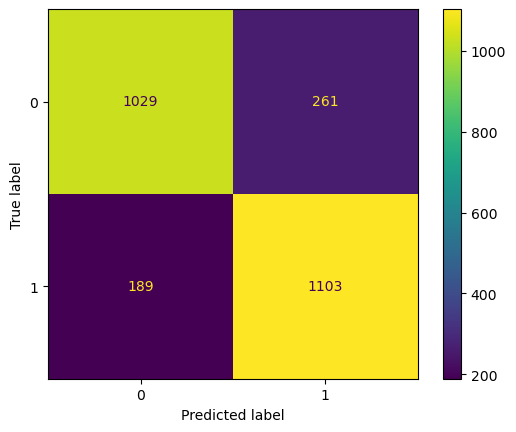

In [116]:
metrics_n = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test)

plt.show()

**We are witnessing the true counts our Model has predicted and result of Confusion matrix is Satisfactory**

**Saving Final model**

In [117]:
import joblib
filename = "Final_RF.pkl"
joblib.dump(Final_Model, filename)

['Final_RF.pkl']

**Model is Completed**

**Thanks for Evaluating the Model**